In [1]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [41]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.color_palette("colorblind")

In [75]:
# Load directly optimized parameters
df_overlap = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')
df_MF = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_MF.json', orient='index')

In [80]:
for dftmp in [df_MF, df_overlap]:
    dftmp['gamma0'] = dftmp.apply(
        lambda row: np.abs(row['gamma'][0]),
        axis=1
    )
    dftmp['beta0'] = dftmp.apply(
        lambda row: np.abs(row['beta'][0]),
        axis=1
    )

# One option for parameter scaling visualization

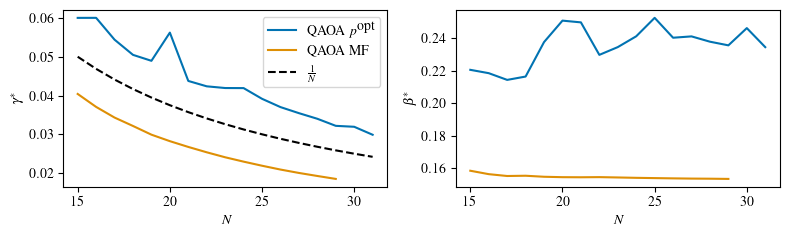

In [84]:
f, ax = plt.subplots(1,2, figsize=(8, 2.47213))

for idx, (dftmp, label) in enumerate([(df_overlap, r'QAOA $p^{\mbox{opt}}$'), (df_MF, 'QAOA MF')]):
    dftmp[(dftmp["p"] == 1) & (dftmp["N"] >= 15)].set_index('N')['gamma0'].plot(ax=ax[0], c=cmap[idx], label=label)
    dftmp[(dftmp["p"] == 1) & (dftmp["N"] >= 15)].set_index('N')['beta0'].plot(ax=ax[1], c=cmap[idx], label=label)

ax[0].plot(range(15, 32), [0.05*15/N for N in range(15, 32)], c='k', label=r"$\frac{1}{N}$", linestyle='dashed')
ax[0].set_ylabel(r"$\gamma^*$")
ax[0].set_xlabel(r"$N$")
ax[1].set_ylabel(r"$\beta^*$")
ax[1].set_xlabel(r"$N$")
ax[0].legend()
plt.tight_layout()
plt.savefig('figures/scaling_of_parameters.pdf')

# Another option

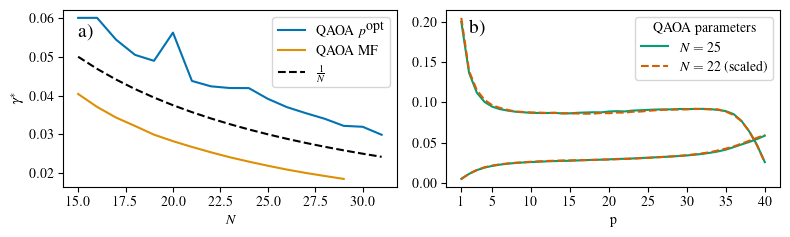

In [112]:
f, ax = plt.subplots(1,2, figsize=(8, 2.47213))

for idx, (dftmp, label) in enumerate([(df_overlap, r'QAOA $p^{\mbox{opt}}$'), (df_MF, 'QAOA MF')]):
    dftmp[(dftmp["p"] == 1) & (dftmp["N"] >= 15)].set_index('N')['gamma0'].plot(ax=ax[0], c=cmap[idx], label=label)

ax[0].plot(range(15, 32), [0.05*15/N for N in range(15, 32)], c='k', label=r"$\frac{1}{N}$", linestyle='dashed')
ax[0].set_ylabel(r"$\gamma^*$")
ax[0].set_xlabel(r"$N$")
ax[0].text(15, 0.055, 'a)', fontsize=14)
ax[0].legend()

p = 40
row = df_MF[(df_MF['N'] == 25) & (df_MF['p'] == p)].squeeze()
ax[1].plot(range(1, p+1), -np.array(row['beta']), c=cmap[2])
ax[1].plot(range(1, p+1), row['gamma'], c=cmap[2], label=r'$N = 25$')
row2 = df_MF[(df_MF['N'] == 22) & (df_MF['p'] == p)].squeeze()
ax[1].plot(range(1, p+1), -np.array(row2['beta']), linestyle='dashed', c=cmap[3])
ax[1].plot(range(1, p+1), np.array(row2['gamma'])*22/25, linestyle='dashed', c=cmap[3], label=r'$N = 22$ (scaled)')
ax[1].legend(title="QAOA parameters")
ax[1].set_xticks([1] + list(range(5, 36, 5)) + [40])
ax[1].text(2, 0.186, 'b)', fontsize=14)
ax[1].set_xlabel(r'$p$')
plt.tight_layout()
plt.savefig('figures/scaling_of_parameters.pdf')